# EDA with Visuals
Create visualizations to answer the questions below. Use the `winequality_edited.csv` dataset, which you should've created  in the previous quiz.

In [14]:
# import numpy and pandas
import numpy  as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import skew

# Load  wines dataset
wines = pd.read_csv('winequality_edited.csv')
wines.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [7]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### Which of the following feature variables appear skewed to the right? Fixed Acidity, Total Sulfur Dioxide, pH, Alcohol  (answer using plots)  

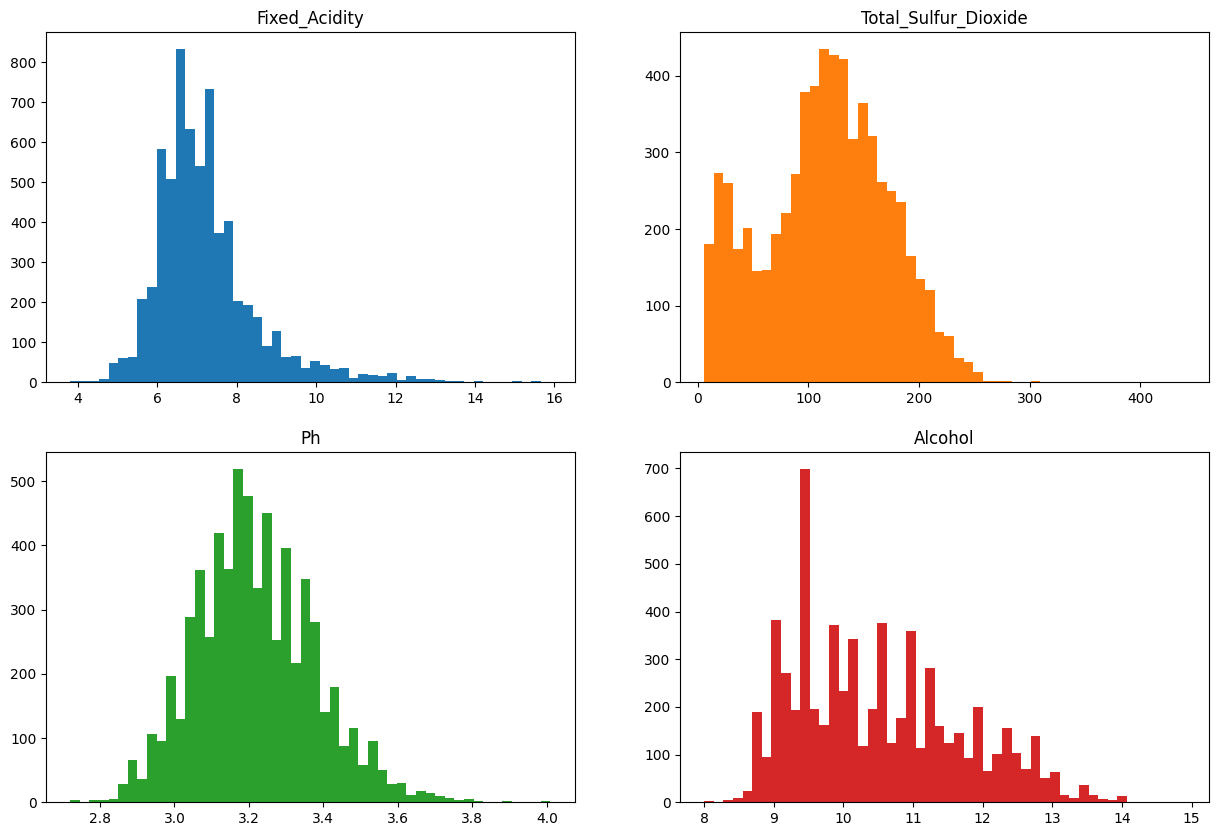

In [10]:
features = ['fixed_acidity', 'total_sulfur_dioxide', 'pH', 'alcohol']

# Plot histograms
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
for i, ax in enumerate(axs.flatten()):
    ax.hist(wines[features[i]], bins=50, color='C'+str(i))
    ax.set_title(features[i].title())
plt.show()
# Fixed Acidity is strongly skewd to the right 
# Alcohol is slightly skewed to the right
# pH is slightly skewed to the right
# Total Sulfur Dioxide  is approximately symmetrical 

In [15]:
# make sure by numbers 
skewness = wines[['fixed_acidity', 'total_sulfur_dioxide', 'pH', 'alcohol']].apply(skew)

print(skewness)

fixed_acidity           1.722892
total_sulfur_dioxide   -0.001177
pH                      0.386749
alcohol                 0.565587
dtype: float64


In [17]:
wines.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### Which of the following is most likely to have a positive impact on quality? Volatile Acidity, Residual Sugar, pH, Alcohol _____________________________ (answer using plots)

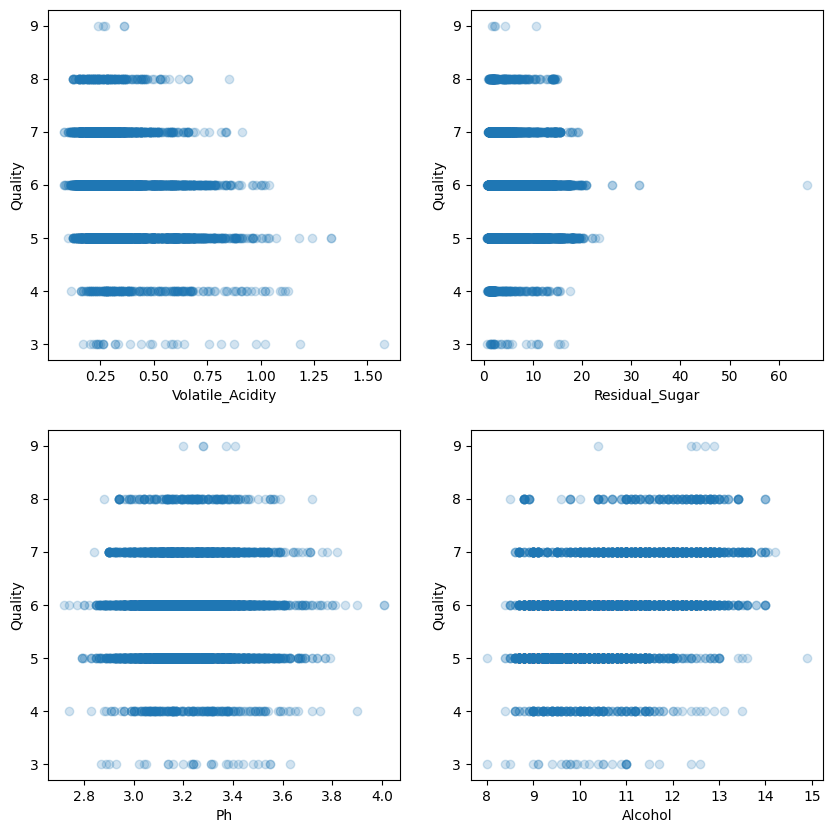

In [18]:
features = ['volatile_acidity', 'residual_sugar', 'pH', 'alcohol']
quality_var = 'quality'

# Create scatter plots 
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i, ax in enumerate(axs.flatten()):
    ax.scatter(wines[features[i]], wines[quality_var], alpha=0.2)
    ax.set_xlabel(features[i].title())
    ax.set_ylabel(quality_var.title())
plt.show() # answer Alcohol

In [19]:

correlations = wines.corr()

# Print correlation coefficients
print(correlations)

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000          0.219008     0.324436   
volatile_acidity           0.219008          1.000000    -0.377981   
citric_acid                0.324436         -0.377981     1.000000   
residual_sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free_sulfur_dioxide       -0.282735         -0.352557     0.133126   
total_sulfur_dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity    

C:\Users\Abdoo\AppData\Local\Temp\ipykernel_3844\3588468553.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = wines.corr()


In [20]:
correlations['quality']

fixed_acidity          -0.076743
volatile_acidity       -0.265699
citric_acid             0.085532
residual_sugar         -0.036980
chlorides              -0.200666
free_sulfur_dioxide     0.055463
total_sulfur_dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64